#                                Sensor Component Failure Prediction

## EDA and project Explanations

## Problem statement.

**Data:** Sensor Data

**Problem statement :**
- The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

- The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

|True class | Positive | Negative | |
| ----------- | ----------- |   |  |
|<b>Predicted class</b>||| |
| Positive      |   -       | cost_1  |    |
| Negative   | cost_2        |  | |


Cost 1 = 10 and Cost 2 = 500

- The total cost of a prediction model the sum of `Cost_1` multiplied by the number of Instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while `Cost_2` refer to the cost of missing a faulty truck, which may cause a breakdown. 
- `Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

- From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to **reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings


# Preprocessing Proccedure:
from sklearn.preprocessing import PowerTransformer, LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# Data Splitting - Train, Test
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score


# ML MODELS:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Evaluation Metrix:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 

warnings.filterwarnings("ignore")
%matplotlib inline

## Steps you need to follow :

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment 
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model
17. Deploying the best model in production


## 1. Load the data

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv',na_values="na")

In [3]:
df.head(10)

class   aa_000  ab_000   ac_000  ad_000  ae_000  af_000  ag_000    ag_001  \
0   pos   153204     0.0    182.0     NaN     0.0     0.0     0.0       0.0   
1   pos   453236     NaN   2926.0     NaN     0.0     0.0     0.0       0.0   
2   pos    72504     NaN   1594.0  1052.0     0.0     0.0     0.0     244.0   
3   pos   762958     NaN      NaN     NaN     NaN     NaN   776.0  281128.0   
4   pos   695994     NaN      NaN     NaN     NaN     NaN     0.0       0.0   
5   pos  1056758     0.0  42328.0   856.0     0.0     0.0     0.0   50394.0   
6   pos   361638     0.0    280.0     NaN     0.0     0.0     0.0       0.0   
7   pos   791254     NaN      NaN     NaN     NaN     NaN     0.0   14868.0   
8   pos  1053152     NaN      NaN     NaN     NaN     NaN     2.0       2.0   
9   pos   785270     NaN      NaN  8994.0     NaN     NaN     0.0       0.0   

      ag_002  ...     ee_002     ee_003     ee_004     ee_005     ee_006  \
0        0.0  ...   129862.0    26872.0    34044.0    22472.0    34362.0   
1      222.0  ...  7908038.0  3026002.0  5025350.0  2025766.0  1160638.0   
2   178226.0  ...  1432098.0   372252.0   527514.0   358274.0   332818.0   
3  2186308.0  ...        NaN        NaN        NaN        NaN        NaN   
4        0.0  ...  1397742.0   495544.0   361646.0    28610.0     5130.0   
5   184552.0  ...  1450086.0   713608.0  1750894.0  4054554.0  4096660.0   
6        0.0  ...   266410.0   114746.0   180006.0   108294.0   111218.0   
7   921256.0  ...  3625532.0  1380864.0  3262488.0  5727988.0  7563752.0   
8       30.0  ...  7093206.0  3379622.0  7362340.0  8442584.0  8120144.0   
9        0.0  ...        0.0        0.0        0.0        0.0        0.0   

       ee_007     ee_008    ee_009  ef_000  eg_000  
0         0.0        0.0       0.0     0.0     0.0  
1    533834.0   493800.0    6914.0     0.0     0.0  
2    284178.0     3742.0       0.0     0.0     0.0  
3         NaN        NaN       NaN     NaN     NaN  
4       212.0        0.0       0.0     NaN     NaN  
5   2295880.0   220478.0     482.0     0.0     0.0  
6    264410.0    33734.0       0.0     0.0     0.0  
7  12114820.0   264714.0     198.0     NaN     NaN  
8   5082396.0  6259760.0  176752.0     NaN     NaN  
9         0.0        0.0       0.0     NaN     NaN  

[10 rows x 171 columns]

### Describe the DataSet

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [5]:
df.shape

(36188, 171)

In [6]:
dtype = ['float64', 'int64', 'O']  # 'O' stands for object type
for dtypes in dtype:
    print(f"Data type: {dtypes}")
    print(df.describe(include=[dtypes]))
    print()  # Add an empty line for better readability

Data type: float64
            ab_000        ac_000        ad_000        ae_000        af_000  \
count  8292.000000  3.404700e+04  2.698800e+04  34601.000000  34601.000000   
mean      0.711770  3.535223e+08  3.185447e+05      7.234300     11.606543   
std       3.054033  7.926486e+08  5.225398e+07    186.437282    234.405353   
min       0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%       0.000000  1.600000e+01  2.400000e+01      0.000000      0.000000   
50%       0.000000  1.520000e+02  1.280000e+02      0.000000      0.000000   
75%       0.000000  9.640000e+02  4.320000e+02      0.000000      0.000000   
max     100.000000  2.130707e+09  8.584298e+09  21050.000000  20070.000000   

             ag_000        ag_001        ag_002        ag_003        ag_004  \
count  3.580900e+04  3.580900e+04  3.580900e+04  3.580900e+04  3.580900e+04   
mean   1.952347e+02  1.508277e+03  1.250718e+04  1.156928e+05  5.068253e+05   
std    1.852862e+04  4.371360e+04  1.8015

In [7]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

## Challenges and other objectives

- Need to Handle many Null values in almost all columns
- No low-latency requirement.
- Interpretability is not important.
- misclassification leads the unecessary repair costs.

<Axes: >

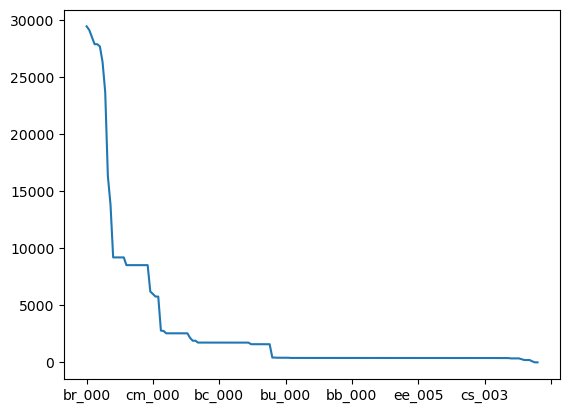

In [9]:
df.isnull().sum().sort_values(ascending=False).plot()

In [10]:
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing

0
br_000  81.410965
bq_000  80.501824
bp_000  78.794075
ab_000  77.086327
cr_000  77.086327
...           ...
cj_000   0.560959
ci_000   0.560959
bt_000   0.237648
aa_000   0.000000
class    0.000000

[171 rows x 1 columns]

In [11]:
# Identify columns with more than 70% missing values
columns_to_drop = missing[missing[0] > 70].index.tolist()

# Drop those columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

missing2 = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
print(missing2)
print(df.shape)

                0
bm_000  65.518957
bl_000  45.139273
bk_000  38.197745
cf_000  25.422792
co_000  25.422792
...           ...
cj_000   0.560959
ci_000   0.560959
bt_000   0.237648
aa_000   0.000000
class    0.000000

[164 rows x 1 columns]
(36188, 164)


### Looking at the distribution of Target variable

<Axes: xlabel='class'>

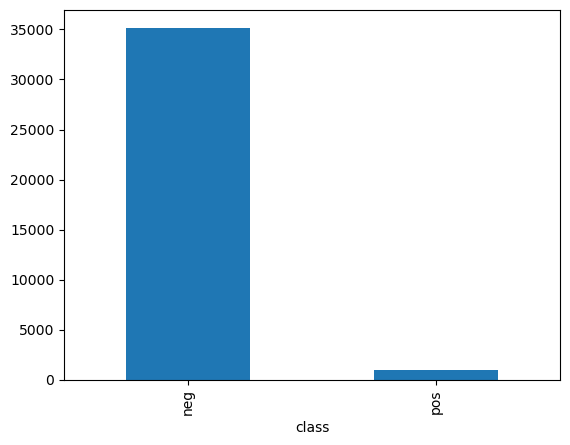

In [12]:
df['class'].value_counts().plot(kind='bar')

In [45]:
numeric_features_new = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(30, 200))
for i, col in enumerate(numeric_features_new):
    plt.subplot(60, 3, i+1) # 60 rows, 3 columns
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [46]:
df.sample(10)

class  aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
11513   neg    8268  7.200000e+01    54.0     0.0     0.0     0.0     0.0   
32114   neg  151456  6.160000e+02   582.0   292.0   474.0     0.0     0.0   
6119    neg     258  1.020000e+02    68.0     0.0     0.0     0.0     0.0   
2984    neg   57810           NaN     NaN     NaN     NaN     0.0     0.0   
15772   neg  101940  2.130706e+09   894.0     0.0     0.0     0.0     0.0   
27075   neg  151064  2.720000e+02   262.0     0.0     0.0     0.0     0.0   
15402   neg   40122  2.130706e+09   144.0     0.0     0.0     0.0     0.0   
9311    neg   16914  1.620000e+02    64.0     0.0     0.0     0.0     0.0   
30103   neg    2890  2.130706e+09   132.0     0.0     0.0     0.0     0.0   
30252   neg      18  4.000000e+01    38.0     0.0     0.0     0.0     0.0   

       ag_002    ag_003  ...     ee_002    ee_003     ee_004     ee_005  \
11513   184.0  222414.0  ...    66628.0   21288.0    33708.0   169006.0   
32114     0.0   57132.0  ...   928634.0  522020.0   587848.0  1084372.0   
6119      0.0       0.0  ...     2342.0     964.0     1374.0      744.0   
2984      0.0       0.0  ...   662786.0  358948.0   690548.0   515944.0   
15772     0.0      58.0  ...   709410.0  436278.0  1207418.0  1273590.0   
27075     0.0       0.0  ...  1187394.0  790272.0  2643564.0  1474036.0   
15402     0.0       0.0  ...   401606.0  245706.0   538818.0   376160.0   
9311      0.0     150.0  ...    76818.0   34254.0    78074.0    97252.0   
30103     0.0       0.0  ...     7286.0    4190.0    12972.0   106734.0   
30252     0.0       0.0  ...      278.0      28.0       40.0       16.0   

          ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
11513    85974.0     554.0     240.0     0.0     0.0     0.0  
32114  3192480.0  384206.0    3670.0    10.0     0.0     0.0  
6119       892.0    4414.0     254.0     0.0     0.0     0.0  
2984    322302.0  137966.0   52378.0    34.0     NaN     NaN  
15772   626508.0  233352.0  211036.0  5984.0     0.0     0.0  
27075   650006.0  268540.0  145934.0    32.0     0.0     0.0  
15402   227924.0   75298.0   17310.0    10.0     0.0     0.0  
9311    346308.0   90100.0     228.0     0.0     0.0     0.0  
30103       18.0       4.0       6.0     0.0     0.0     0.0  
30252        6.0       0.0       0.0     0.0     0.0     0.0  

[10 rows x 164 columns]

In [47]:
import scipy.stats as stats

# Identify numeric features
numeric_features_new = [feature for feature in df.columns if df[feature].dtype != 'O']

# Set up the figure for multiple Q-Q plots
plt.figure(figsize=(30, 200))

for i, col in enumerate(numeric_features_new):
    plt.subplot(60, 3, i + 1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')  # Corrected title to show the specific column
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [48]:
df.describe()

aa_000        ac_000        ad_000        ae_000        af_000  \
count  3.618800e+04  3.404700e+04  2.698800e+04  34601.000000  34601.000000   
mean   6.591016e+04  3.535223e+08  3.185447e+05      7.234300     11.606543   
std    1.641238e+05  7.926486e+08  5.225398e+07    186.437282    234.405353   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%    8.660000e+02  1.600000e+01  2.400000e+01      0.000000      0.000000   
50%    3.102600e+04  1.520000e+02  1.280000e+02      0.000000      0.000000   
75%    5.006850e+04  9.640000e+02  4.320000e+02      0.000000      0.000000   
max    2.746564e+06  2.130707e+09  8.584298e+09  21050.000000  20070.000000   

             ag_000        ag_001        ag_002        ag_003        ag_004  \
count  3.580900e+04  3.580900e+04  3.580900e+04  3.580900e+04  3.580900e+04   
mean   1.952347e+02  1.508277e+03  1.250718e+04  1.156928e+05  5.068253e+05   
std    1.852862e+04  4.371360e+04  1.801543e+05  8.853380e+05  2.472058e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.180000e+02   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.798000e+03   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  5.224600e+04   
max    3.376892e+06  4.109372e+06  1.055286e+07  2.904730e+07  5.396293e+07   

       ...        ee_002        ee_003        ee_004        ee_005  \
count  ...  3.580900e+04  3.580900e+04  3.580900e+04  3.580900e+04   
mean   ...  4.853621e+05  2.293208e+05  4.837846e+05  4.401019e+05   
std    ...  1.254188e+06  5.948054e+05  1.251106e+06  1.331837e+06   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.986000e+03  1.190000e+03  2.732000e+03  3.680000e+03   
50%    ...  2.378500e+05  1.137840e+05  2.263560e+05  1.952480e+05   
75%    ...  4.470120e+05  2.222860e+05  4.748680e+05  4.103280e+05   
max    ...  3.123272e+07  1.676929e+07  2.747758e+07  5.743524e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  3.580900e+04  3.580900e+04  3.580900e+04  3.580900e+04  34458.000000   
mean   3.686943e+05  3.718051e+05  1.485117e+05  8.897664e+03      0.083464   
std    1.220688e+06  1.722483e+06  5.153265e+05  5.316375e+04      3.789020   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    5.660000e+02  1.180000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    9.559400e+04  4.296600e+04  4.278000e+03  0.000000e+00      0.000000   
75%    2.791920e+05  1.706080e+05  1.432300e+05  2.018000e+03      0.000000   
max    3.160781e+07  3.727856e+07  1.926740e+07  3.810078e+06    362.000000   

             eg_000  
count  34459.000000  
mean       0.209234  
std        8.613915  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1146.000000  

[8 rows x 163 columns]